# Pauta Notebook 3:  Agrupamiento Jerárquico y Redes de Kohonen 
En este notebook vamos a implementar dos algoritmos de clustering: el agrupamiento jeráquico  de clustering y los mapas autoorganizados (SOM) o redes de Kohonen en R. El objetivo es entender como funcionan estos algoritmos y  aprender a utilizarlos con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.


In [1]:
help(hclust)

hclust {stats},R Documentation
d,a dissimilarity structure as produced by dist.
method,"the agglomeration method to be used. This should be (an unambiguous abbreviation of) one of ""ward.D"", ""ward.D2"", ""single"", ""complete"", ""average"" (= UPGMA), ""mcquitty"" (= WPGMA), ""median"" (= WPGMC) or ""centroid"" (= UPGMC)."
members,NULL or a vector with length size of d. See the ‘Details’ section.
x,an object of the type produced by hclust.
hang,The fraction of the plot height by which labels should hang below the rest of the plot. A negative value will cause the labels to hang down from 0.
check,"logical indicating if the x object should be checked for validity. This check is not necessary when x is known to be valid such as when it is the direct result of hclust(). The default is check=TRUE, as invalid inputs may crash R due to memory violation in the internal C plotting code."
labels,A character vector of labels for the leaves of the tree. By default the row names or row numbers of the original data are used. If labels = FALSE no labels at all are plotted.
"axes, frame.plot, ann",logical flags as in plot.default.
"main, sub, xlab, ylab",character strings for title. sub and xlab have a non-NULL default when there's a tree$call.
...,"Further graphical arguments. E.g., cex controls the size of the labels (if plotted) in the same way as text."


In [2]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 25  5

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

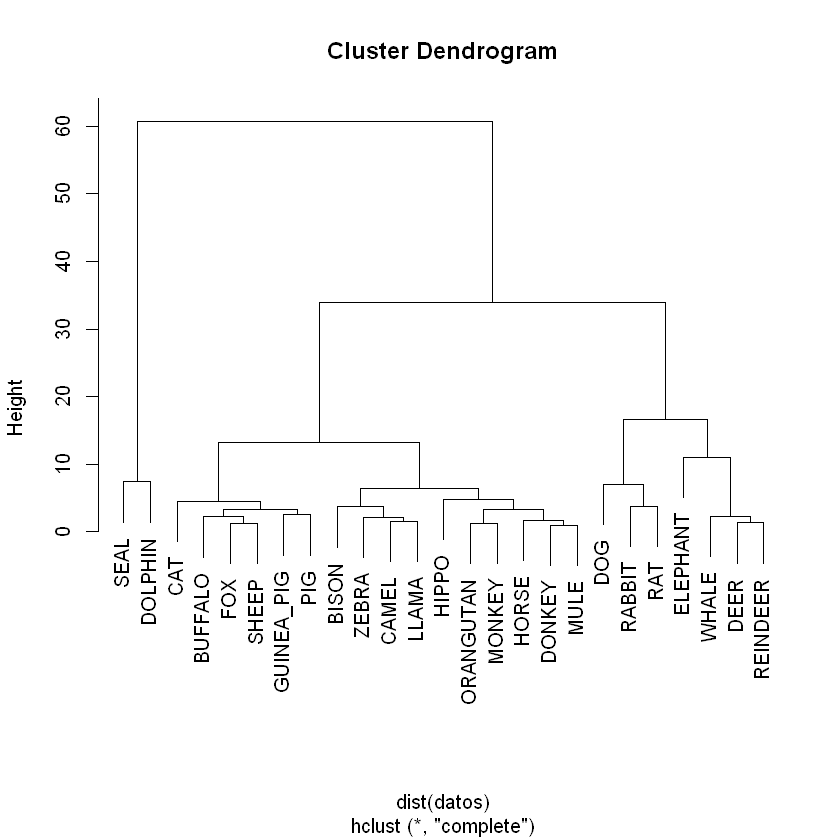

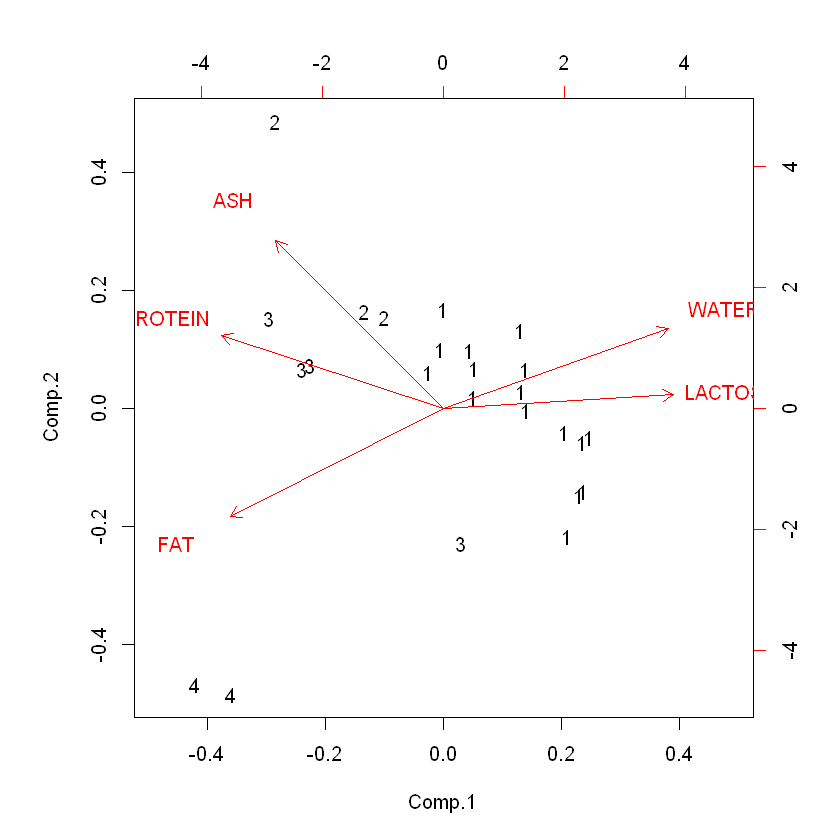

In [3]:
res3 <- hclust(dist(datos))
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))
cl <- cutree(res3,4)

In [4]:

apply(datos[cl==1,],2,summary)
apply(datos[cl==2,],2,summary)
apply(datos[cl==3,],2,summary)
apply(datos[cl==4,],2,summary)


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,81.6000,0.600,1.000,2.70000,0.100000
1st Qu.,82.0750,2.150,2.475,4.62500,0.387500
Median,86.7000,3.700,4.000,5.10000,0.730000
Mean,86.0625,4.275,4.175,5.11875,0.635625
3rd Qu.,88.8750,6.075,6.000,5.77500,0.862500
Max.,90.4000,10.100,7.900,6.90000,1.100000


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,71.30000,9.20000,9.50000,1.900000,1.200000
1st Qu.,71.90000,9.25000,11.05000,2.450000,1.300000
Median,72.50000,9.30000,12.60000,3.000000,1.400000
Mean,73.36667,10.26667,11.73333,2.733333,1.633333
3rd Qu.,74.40000,10.80000,12.85000,3.150000,1.850000
Max.,76.30000,12.30000,13.10000,3.300000,2.300000


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,64.80,3.60,17.600,1.600,0.6300
1st Qu.,64.80,8.70,19.175,2.275,1.2075
Median,65.35,10.55,20.000,2.550,1.4000
Mean,66.55,8.95,19.700,3.075,1.2825
3rd Qu.,67.10,10.80,20.525,3.350,1.4750
Max.,70.70,11.10,21.200,5.600,1.7000


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,44.900,9.700,34.900,0.000,0.53
1st Qu.,45.275,9.925,36.675,0.225,0.61
Median,45.650,10.150,38.450,0.450,0.69
Mean,45.650,10.150,38.450,0.450,0.69
3rd Qu.,46.025,10.375,40.225,0.675,0.77
Max.,46.400,10.600,42.000,0.900,0.85


**Ejercicio 1:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 


#### Respuesta Ejercicio 1:

**(a)** Este método desarrolla un análisis jerárquico aglomerativo, que considera que inicialmente cada observación representa un grupo, y luego en cada paso va agrupando observaciones hasta llegar a un sólo grupo. El criterio de agrupamiento está basado en la matriz de disimilaridades (distancias) que se provee como argumento y el método considerado para definir la distancia entre grupos ("single", "complete", "average", etc)

Los principales parámetros de entrada son:
-   d: la matriz de disimilaridades tal como la producida por el método dist.  
- method: el método de aglomeración definido (("single", "complete", "average", etc.), por omisión utiliza "complete".
- members: permite identificar grupos iniciales a partir de los cuales se desarrolla el algoritmo aglomerativo

La salida del método es un objeto de la clase hclust, cuyas principales componentes son:
- merge: una matriz de (n-1)x2 que contiene en cada fila, un paso en el algoritmo aglomerativo, descritos por los índices (con signo -) de las observaciones que se agrupan, o el número del paso (con signo +) del paso anterior en que se definió el grupo que se va a fusionar.
- height: el valor de la disimilaridad entre grupos que dio origen a la fusión de dos grupos en cada uno de los n-1 pasos.
- order: un vector que da la permutación de las observaciones originales adecuadas para graficar, para no tener cruces de ramas.

Además es útil la función cutree, que tiene como parámetros un objeto de tipo hclust, el número de grupos definidos o bien un valor de corte para height y devuelve el grupo al que pertenece cada observación.

**(b)** el agrupamiento obtenido con 4 grupos nos muestra los siguientes grupos:
- Grupo 1: aqui se agrupan la mayor parte de las especies que comparten una composición de leche alta en lactosa y agua.
- Grupo 2: en este grupo se encuentran las especies con leche con atas concentraciones de calcio y también de proteínas.
- Grupo 3: la mayor parte de las especies en este grupo se caracterizan por leche alta en proteínas
- Grupo 4: contiene dos especies bastante lejanas a las otras que se caracterizan por tener leche con alto contenido de grasa y algo menor de proteína.
  

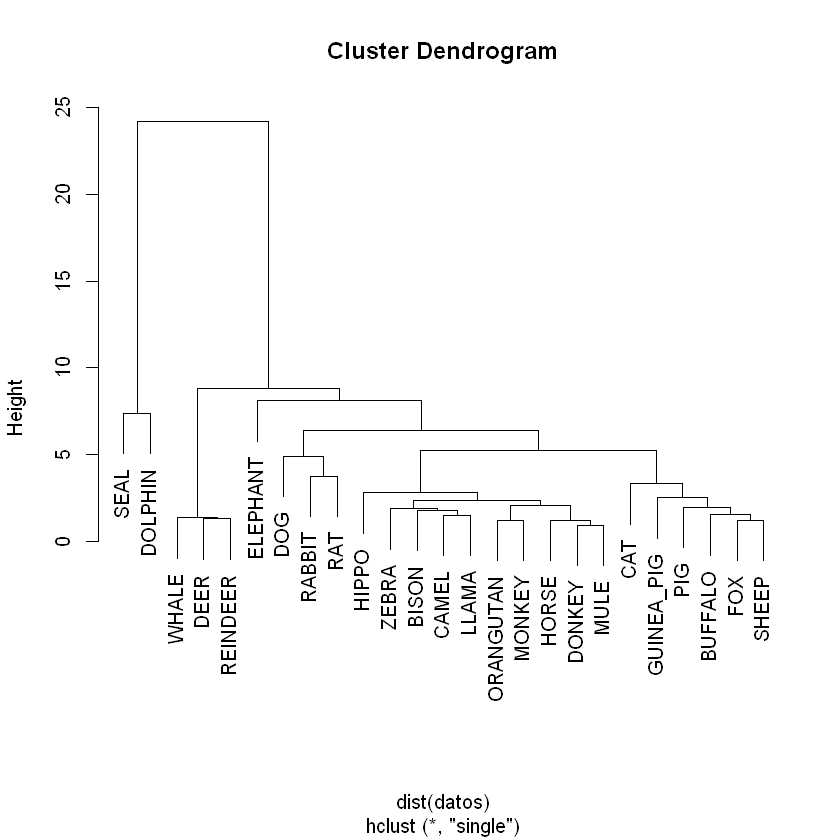

,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,71.30000,0.600000,1.000000,1.900000,0.1000000
1st Qu.,81.75000,2.400000,2.950000,4.050000,0.4350000
Median,86.20000,4.800000,4.800000,4.800000,0.7800000
Mean,84.05789,5.221053,5.368421,4.742105,0.7931579
3rd Qu.,88.45000,7.250000,6.800000,5.650000,0.9200000
Max.,90.40000,12.300000,13.100000,6.900000,2.3000000


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,70.7,3.6,17.6,5.6,0.63
1st Qu.,70.7,3.6,17.6,5.6,0.63
Median,70.7,3.6,17.6,5.6,0.63
Mean,70.7,3.6,17.6,5.6,0.63
3rd Qu.,70.7,3.6,17.6,5.6,0.63
Max.,70.7,3.6,17.6,5.6,0.63


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,64.80000,10.40000,19.70,1.600000,1.40
1st Qu.,64.80000,10.55000,20.00,2.050000,1.40
Median,64.80000,10.70000,20.30,2.500000,1.40
Mean,65.16667,10.73333,20.40,2.233333,1.50
3rd Qu.,65.35000,10.90000,20.75,2.550000,1.55
Max.,65.90000,11.10000,21.20,2.600000,1.70


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,44.900,9.700,34.900,0.000,0.53
1st Qu.,45.275,9.925,36.675,0.225,0.61
Median,45.650,10.150,38.450,0.450,0.69
Mean,45.650,10.150,38.450,0.450,0.69
3rd Qu.,46.025,10.375,40.225,0.675,0.77
Max.,46.400,10.600,42.000,0.900,0.85


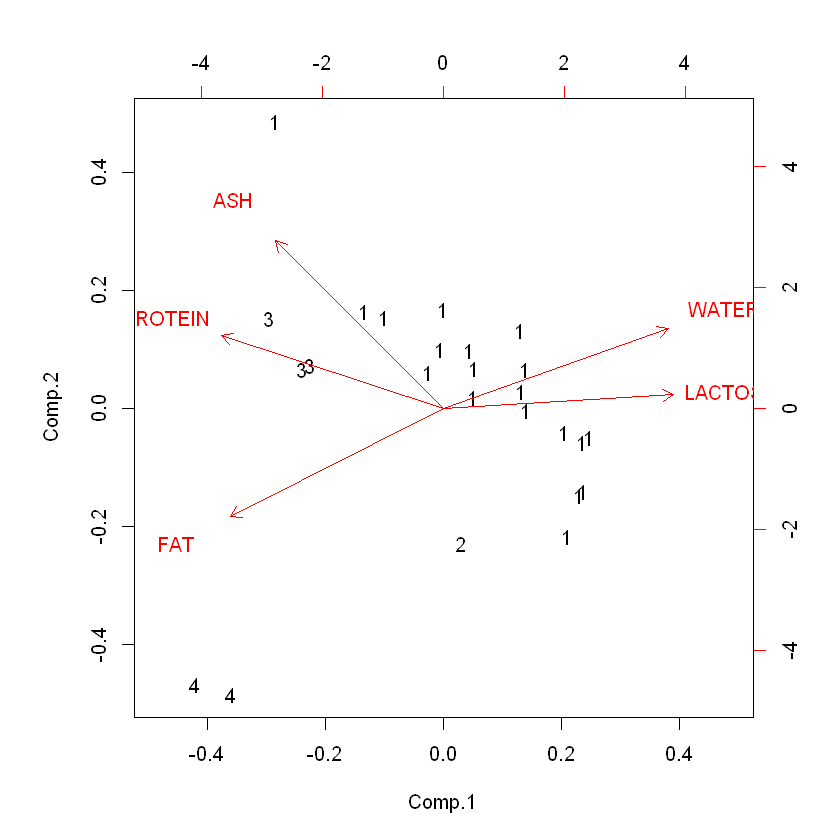

In [5]:
res3 <- hclust(dist(datos),method="single")
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))
cl <- cutree(res3,4)
apply(datos[cl==1,],2,summary)
apply(datos[cl==2,],2,summary)
apply(datos[cl==3,],2,summary)
apply(datos[cl==4,],2,summary)

**(c)** al utilizar el método "single" se genera un primer grupo mas disperso, que incluye los grupos 1 y 2 orginales y por otra parte, el grupo 3 se descompone
en 2 grupos para separar la especie elefante en un grupo con 1 sólo individuo.

### Respuesta Ejercicio 2
**(a)**
El método som ajusta una red neuronal pre-alimentada, cuya salida es un mapa característico en 2D (compuesto de una malla de nodos)y la entradas son datos de alta dimensionalidad. Para ello utiliza el algoritmo de autoorganización de kohonen y la distancia euclidiana entre los nodos del mapa característico.
Los principales parámetros del método son:
- data: matriz en que cada fila representa una observación
- grid: el tipo de malla en el mapa característico
- rlen: el número de veces que el conjunto entero de datos es utilizado para ajustar la red neuronal. Por omisión es 100.
- alpha: tasa de aprendizaje, vector con el rango en cual variar linealmente la tasa de aprendizaje
- radius: radio de activación 
- init: valores iniciales de los pesos de la red. Por omisión se escogen aleatorios en el rango de los datos.

La salida es un objeto de la clase kohonen, cuyas principales componentes son:
   
- grid: la malla, un objeto de la clase "somgrid".
- codes: una matriz con los pesos de  cada nodo del mapa característico
- changes: un vector con la media de las distancias entre nodos vecinos en cada iteración. Representan una medida del ajuste de la red. 
- unit.classif: nodos activados por cada observación. Sólo se retorna si keep.data == TRUE.
- distances: distancia de la observación al nodo activado.  Sólo se retorna si keep.data == TRUE.


Los gráficos desplegados muestra respectivamente:
1) los tres primeros gráficos son representaciones de los pesos de cada variable en los nodos (codes)
2) el número de observaciones por nodo (el nodo que se activa con dicha observación)
3) el lugar dónde se ubican las distintas observaciones respecto de cada nodo en el mapa característico
4) la distancia unificada entre nodos vecinos, que para cada nodo se calcula como un promedio de las distancias entre pares de datos originales: donde un elemento del par activa el nodo seleccionado y el otro elemento activa un nodo vecino. 

**(c)** Es posible graficar changes, variando el valor de rlen y podemos ver que en este caso se logra convergencia desde 200 iteraciones.
Distintas configuraciones del mapa, representan mas o menos grupos a definir.

**A continuación instalamos la biblioteca kohonen para utilizar som, el método de mapas autoorganizados que permite realizar un análisis de agrupamiento**

In [6]:
#install.packages("kohonen")
library(kohonen)
set.seed(7)

Warning message:
"package 'kohonen' was built under R version 3.6.3"

In [7]:
help(som)

supersom {kohonen},R Documentation
"X, Y","numerical data matrices, or factors. No data.frame objects are allowed - convert them to matrices first."
data,"list of data matrices (numerical) of factors. If a vector is entered, it will be converted to a one-column matrix. No data.frame objectss are allowed."
grid,a grid for the codebook vectors: see somgrid.
rlen,the number of times the complete data set will be presented to the network.
alpha,"learning rate, a vector of two numbers indicating the amount of change. Default is to decline linearly from 0.05 to 0.01 over rlen updates. Not used for the batch algorithm."
radius,"the radius of the neighbourhood, either given as a single number or a vector (start, stop). If it is given as a single number the radius will change linearly from radius to zero; as soon as the neighbourhood gets smaller than one only the winning unit will be updated. Note that the default before version 3.0 was to run from radius to -radius. If nothing is supplied, the default is to start with a value that covers 2/3 of all unit-to-unit distances."
whatmap,What data layers to use. If unspecified all layers are used.
user.weights,"the weights given to individual layers. This can be a single number (all layers have the same weight, the default), a vector of the same length as the whatmap argument, or a vector of the same length as the data argument. In xyf maps, this argument provides the same functionality as the now-deprecated xweight argument that was used prior to version 3.0."
maxNA.fraction,the maximal fraction of values that may be NA to prevent the row to be removed.
keep.data,"if TRUE, return original data and mapping information. If FALSE, only return the trained map (in essence the codebook vectors)."


[[1]]
        WATER    PROTEIN        FAT     LACTOSE         ASH
V1 -2.5356874  1.0729314  2.6899058 -2.02042124 -0.32965999
V2 -0.7799697  1.2599683  0.6351271 -0.96937503  1.62080612
V3  0.1782588  0.2255258 -0.2440329  0.02172521  0.05902769
V4  0.8071564 -0.9927413 -0.7233456  0.86466273 -0.73162491



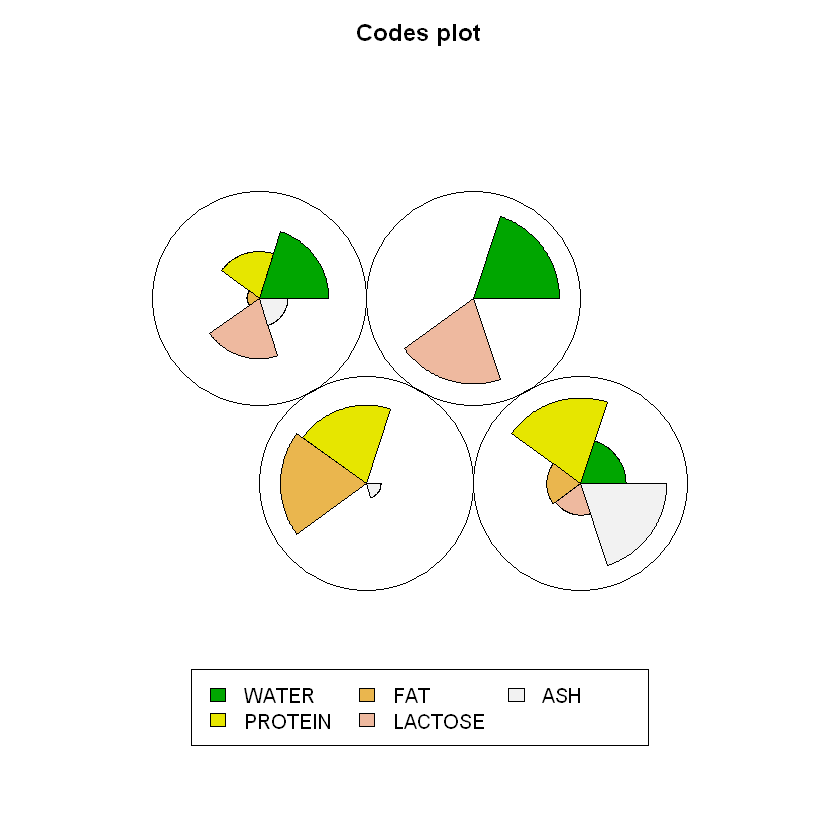

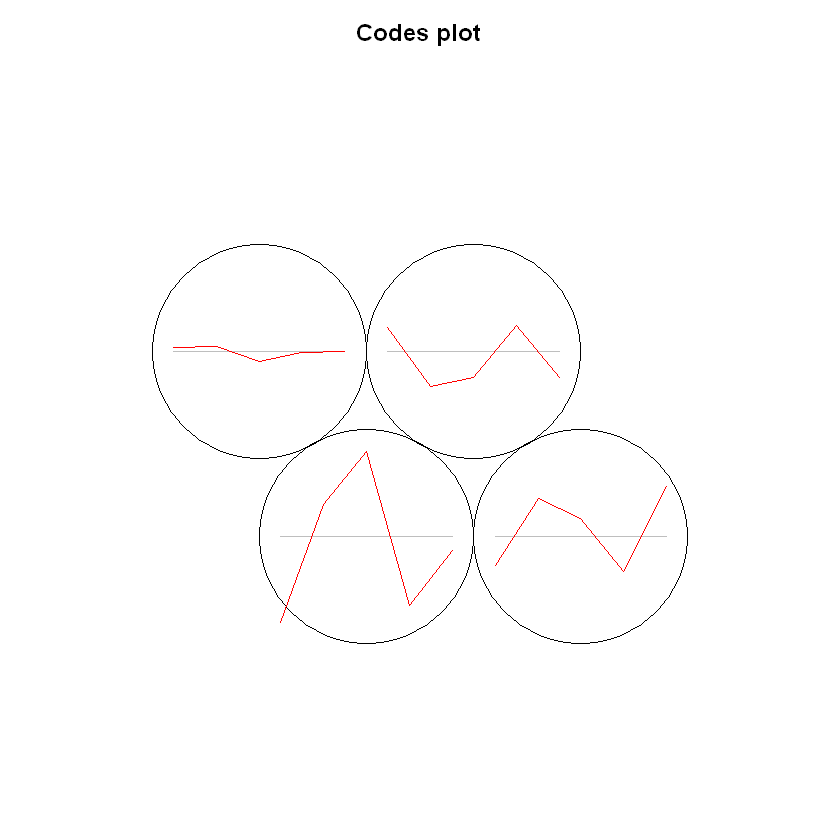

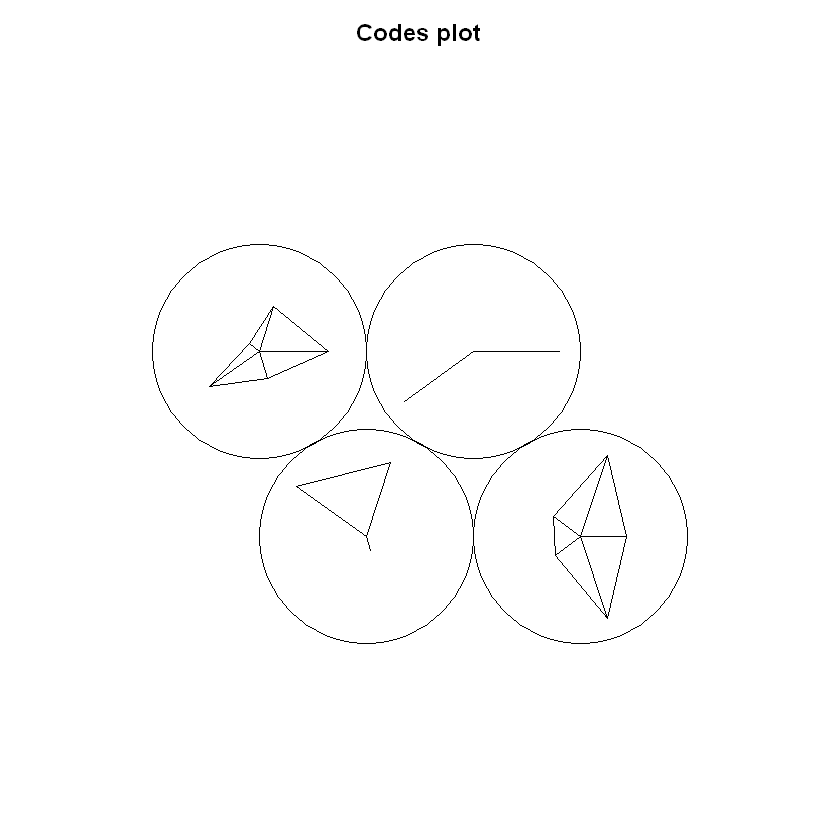

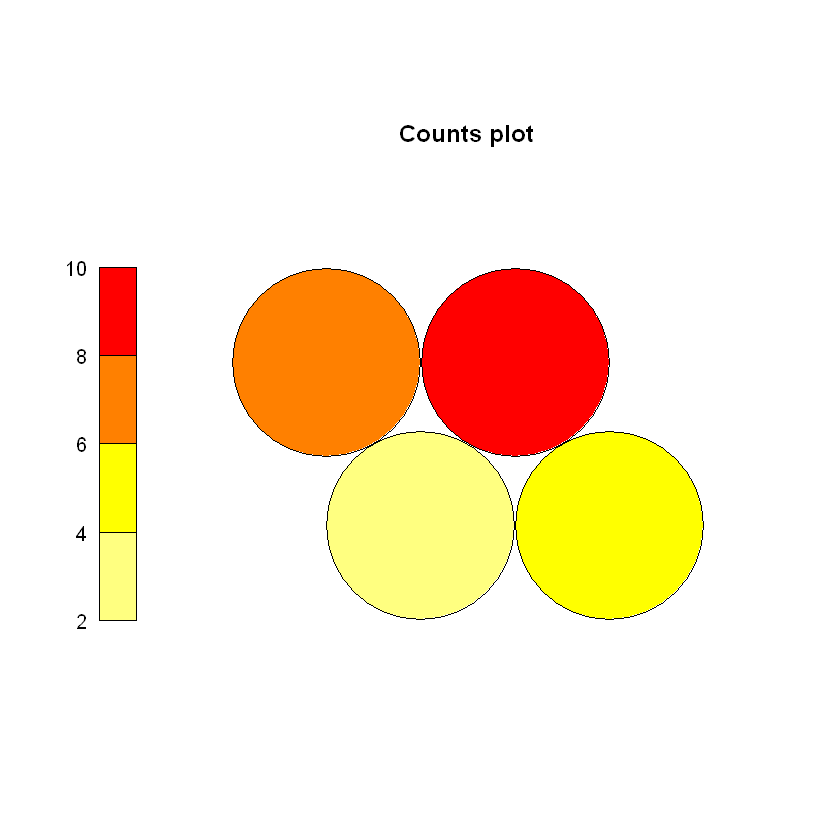

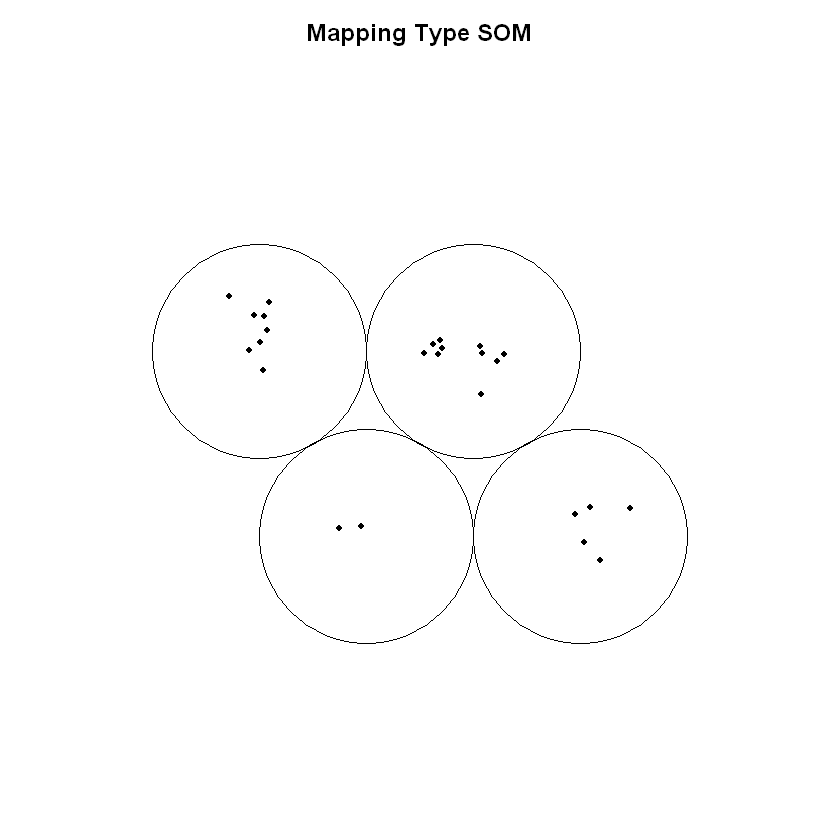

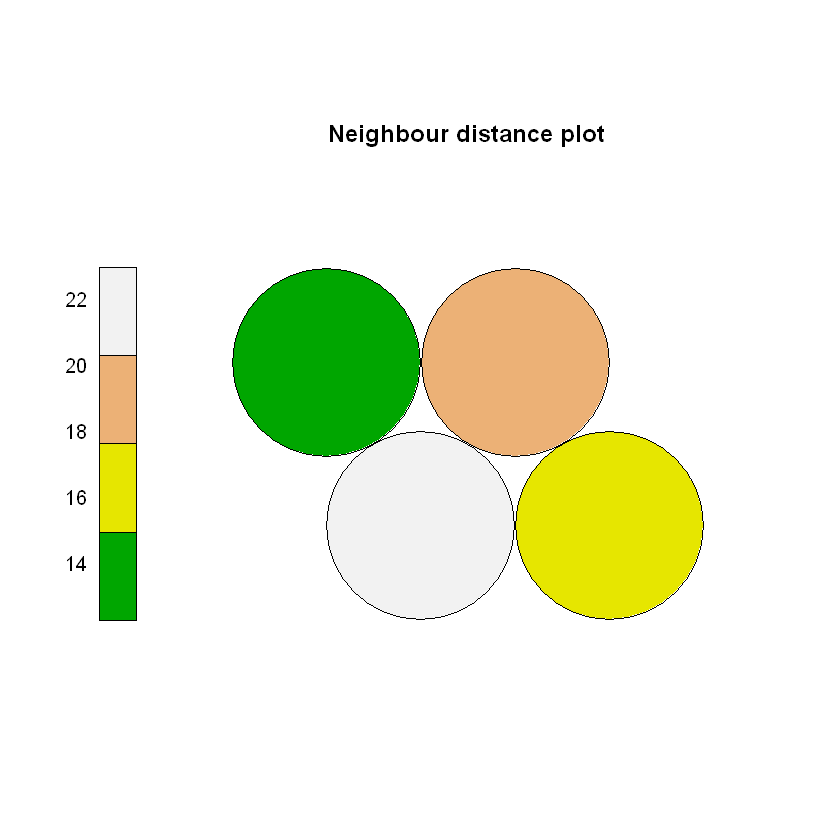

In [8]:
#create SOM grid
sommap <- som(scale(datos), rlen=1000, grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

**Ejercicio 2:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

c) Compare estos resultados con los del agrupamiento jerárquico. Discuta sus resultados.

#### Respuesta Ejercicio 2: 
**(a)**
El método som ajusta una red neuronal pre-alimentada, cuya salida es un mapa característico en 2D (compuesto de una malla de nodos)y la entradas son datos de alta dimensionalidad. Para ello utiliza el algoritmo de autoorganización de kohonen y la distancia euclidiana entre los nodos del mapa característico.
Los principales parámetros del método son:
- data: matriz en que cada fila representa una observación
- grid: el tipo de malla en el mapa característico
- rlen: el número de veces que el conjunto entero de datos es utilizado para ajustar la red neuronal. Por omisión es 100.
- alpha: tasa de aprendizaje, vector con el rango en cual variar linealmente la tasa de aprendizaje
- radius: radio de activación 
- init: valores iniciales de los pesos de la red. Por omisión se escogen aleatorios en el rango de los datos.

La salida es un objeto de la clase kohonen, cuyas principales componentes son:
   
- grid: la malla, un objeto de la clase "somgrid".
- codes: una matriz con los pesos de  cada nodo del mapa característico
- changes: un vector con la media de las distancias entre nodos vecinos en cada iteración. Representan una medida del ajuste de la red. 
- unit.classif: nodos activados por cada observación. Sólo se retorna si keep.data == TRUE.
- distances: distancia de la observación al nodo activado.  Sólo se retorna si keep.data == TRUE.


Los gráficos desplegados muestran respectivamente:
1) los tres primeros gráficos son representaciones de los pesos de cada variable en los nodos (codes)
2) el número de observaciones por nodo (el nodo que se activa con dicha observación)
3) el lugar dónde se ubican las distintas observaciones respecto de cada nodo en el mapa característico
4) la distancia unificada entre nodos vecinos, que para cada nodo se calcula como un promedio de las distancias entre pares de datos originales: donde un elemento del par activa el nodo seleccionado y el otro elemento activa un nodo vecino.


[[1]]
         WATER    PROTEIN         FAT    LACTOSE         ASH
V1 -0.90294235  1.3269404  0.79735001 -1.0602848  1.60161968
V2  0.08585920 -0.1996414 -0.09639042  0.4538068 -0.09727087
V3  0.88497565 -1.2165726 -0.74007298  0.9964808 -1.15810025
V4 -2.53672988  1.0751265  2.68389224 -2.0160443 -0.33530700
V5  0.04821443  0.7036555 -0.19080882 -0.3461373  0.37833489
V6  0.67431858 -0.6658040 -0.66548679  0.6579439 -0.17467171

 [1] 3 3 3 3 3 6 6 2 5 5 2 6 3 5 6 2 5 2 1 5 1 1 1 4 4


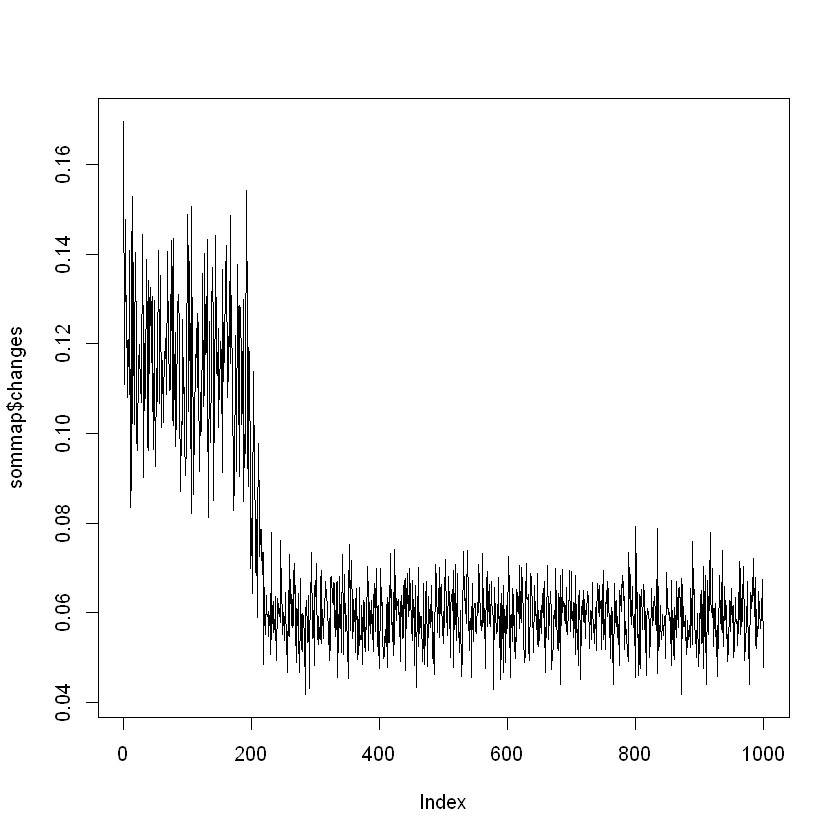

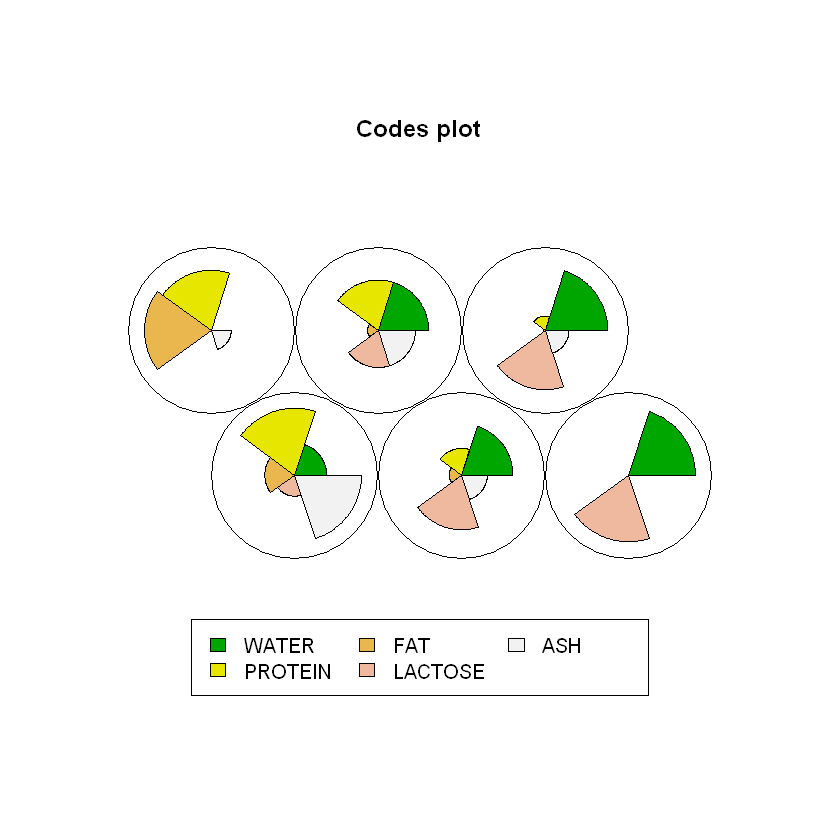

In [9]:
sommap <- som(scale(datos),rlen=1000, grid = somgrid(3,2, "hexagonal"), keep.data=TRUE)
print(sommap$codes)
plot(sommap$changes, type="l")
print(sommap$unit.classif)

plot(sommap)

**(b)** Es posible graficar changes, variando el valor de rlen y podemos ver que en este caso se logra convergencia desde 200 iteraciones. Distintas configuraciones del mapa, representan mas o menos grupos a definir.


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,44.900,9.700,34.900,0.000,0.53
1st Qu.,45.275,9.925,36.675,0.225,0.61
Median,45.650,10.150,38.450,0.450,0.69
Mean,45.650,10.150,38.450,0.450,0.69
3rd Qu.,46.025,10.375,40.225,0.675,0.77
Max.,46.400,10.600,42.000,0.900,0.85


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,64.80,9.20,12.60,1.60,1.40
1st Qu.,64.80,10.40,13.10,1.90,1.40
Median,65.90,10.70,19.70,2.50,1.40
Mean,67.86,10.74,17.38,2.38,1.64
3rd Qu.,71.30,11.10,20.30,2.60,1.70
Max.,72.50,12.30,21.20,3.30,2.30


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,70.700,3.600,5.1000,2.7000,0.63000
1st Qu.,80.275,5.825,6.2000,3.5250,0.77250
Median,81.750,6.850,6.8000,4.5500,0.88000
Mean,79.875,6.950,8.2375,4.2125,0.89375
3rd Qu.,82.025,7.875,8.3000,4.7500,0.97250
Max.,82.800,10.100,17.6000,5.6000,1.20000


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,86.200,0.600,1.000,4.40,0.1000
1st Qu.,87.100,1.775,1.725,5.35,0.2675
Median,88.450,2.400,2.950,5.65,0.4350
Mean,88.500,2.570,2.800,5.68,0.4850
3rd Qu.,90.075,3.375,3.475,6.15,0.7075
Max.,90.400,4.800,4.800,6.90,0.9000


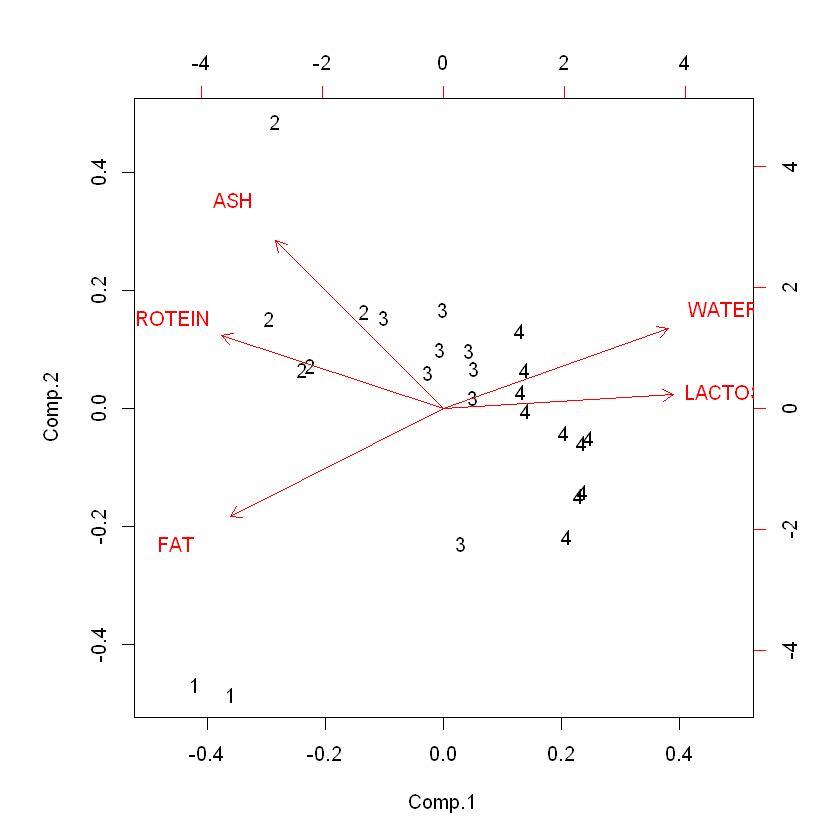

In [10]:
set.seed(7)
sommap <- som(scale(datos),rlen=1000, grid = somgrid(2,2, "hexagonal"), keep.data=TRUE)
res <- princomp(datos, cor=TRUE)
cl <- sommap$unit.classif
biplot(res,xlabs=cl)
apply(datos[cl==1,],2,summary)
apply(datos[cl==2,],2,summary)
apply(datos[cl==3,],2,summary)
apply(datos[cl==4,],2,summary)

**(c)** Considerando un mapa característico con 4 nodos y comparando con el agrupamiento jerárquico, podemos observar que som logra diferenciar las especies con valores medios de todos los componentes de la leche en el Grupo 3, dejándo en el Grupo 4, aquellas con concentraciones mas altas de agua y lactosa. Los otros 2 grupos permanecen inalterados.

**Ejercicio 3:**

Considere el subconjunto de datos del archivo tiposMusica.csv que ha estudiado en las tareas anteriores. 

a) Escoja dos de los cuatro métodos de agrupamiento estudiado en esta unidad y realice un análisis de agrupamiento con estos datos. 

b) Compare sus resultados con la medida de calidad de su preferencia y considerando la etiqueta del tipo de música disponible en la primera columna de datos. Discuta sus resultados.

In [11]:
purity <- function(clusters, clases) {
  sum(apply(table(clases, clusters), 2, max)) / length(clusters)
}

In [12]:
datosC <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")
datosC[1:10,c(1,4:14)]

genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Classical,14,0.942,0.350,79333,0.0761,0.00e+00,0.1560,-22.003,0.0352,140.044,0.0293
Classical,13,0.991,0.236,261000,0.0753,3.15e-03,0.0858,-23.232,0.0426,122.973,0.3000
Classical,2,0.994,0.240,48000,0.2510,9.58e-01,0.1020,-11.310,0.0394,99.234,0.1600
Classical,32,0.996,0.387,136293,0.0222,9.22e-01,0.1200,-29.504,0.1400,112.360,0.0687
Classical,29,0.994,0.358,154147,0.2050,1.45e-05,0.1490,-13.588,0.0430,87.696,0.5180
Classical,25,0.993,0.470,70987,0.2040,9.15e-01,0.1180,-21.667,0.0653,138.257,0.0398
Classical,0,0.644,0.415,64760,0.0197,0.00e+00,0.1970,-34.225,0.0369,74.338,0.2280
Classical,0,0.993,0.380,297372,0.0414,9.23e-01,0.1130,-22.443,0.0350,75.241,0.5470
Classical,23,0.993,0.332,219947,0.2300,8.72e-01,0.1110,-23.125,0.0620,99.962,0.0356
Classical,17,0.982,0.173,86401,0.1020,3.49e-02,0.1460,-24.937,0.0387,86.998,0.3350


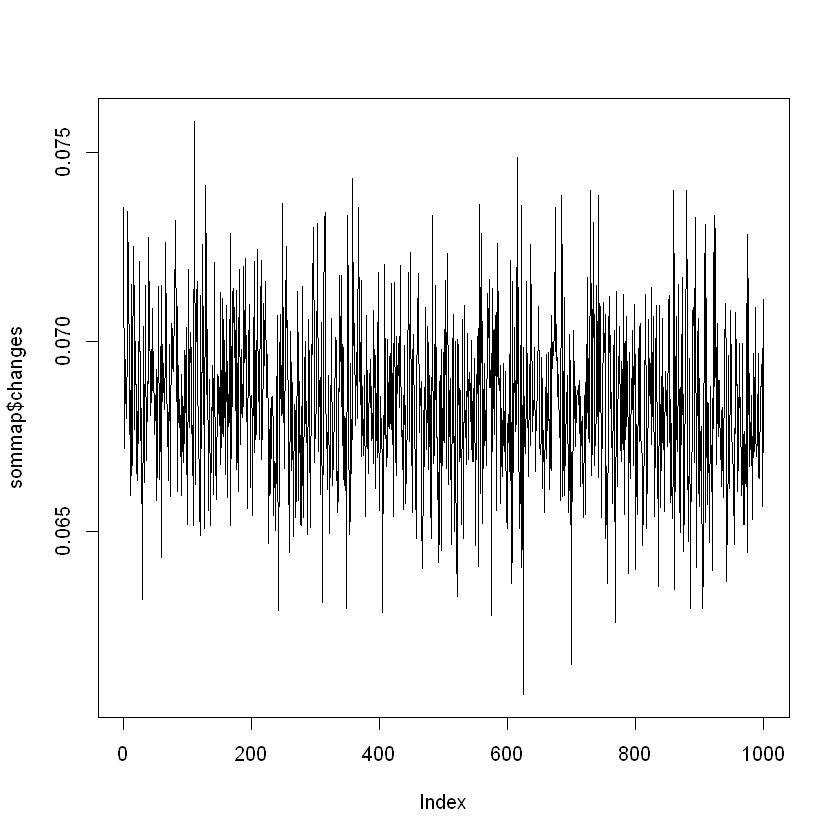

In [19]:
sommap <- som(scale(datosC[,4:14]),rlen=1000, grid = somgrid(3,1, "hexagonal"), keep.data=TRUE)
plot(sommap$changes, type="l")

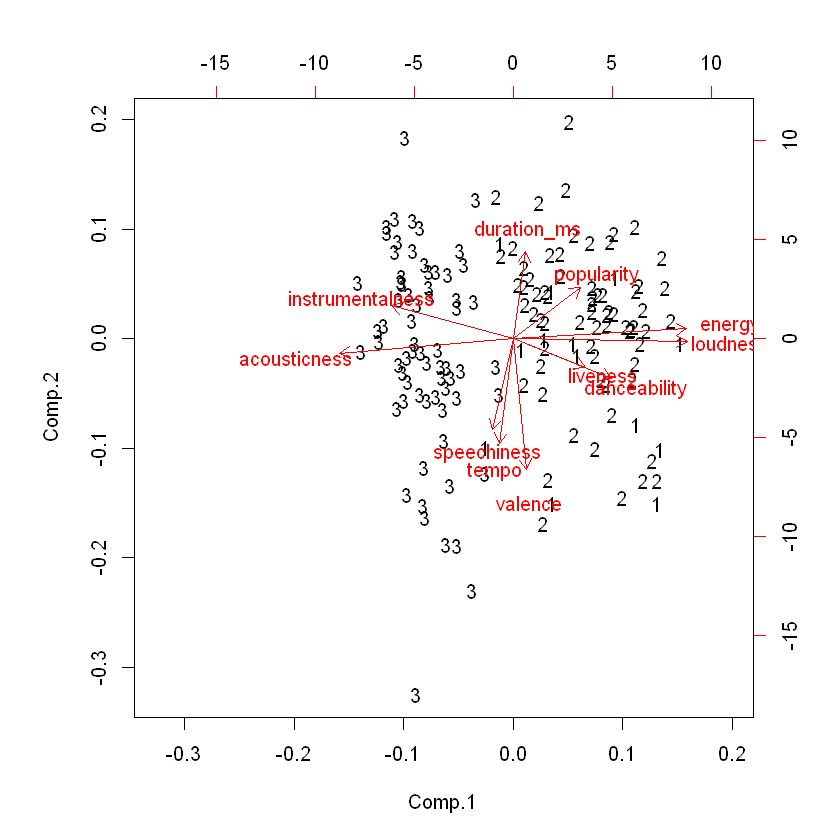

In [20]:
res <- princomp(datosC[,4:14], cor=TRUE)
cl1 <- sommap$unit.classif
biplot(res,xlabs=cl1)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVI (diagonal, equal volume, varying shape) model with 3 components: 

 log-likelihood   n df       BIC       ICL
      -3139.174 149 66 -6608.609 -6614.845

Clustering table:
 1  2  3 
63 45 41 

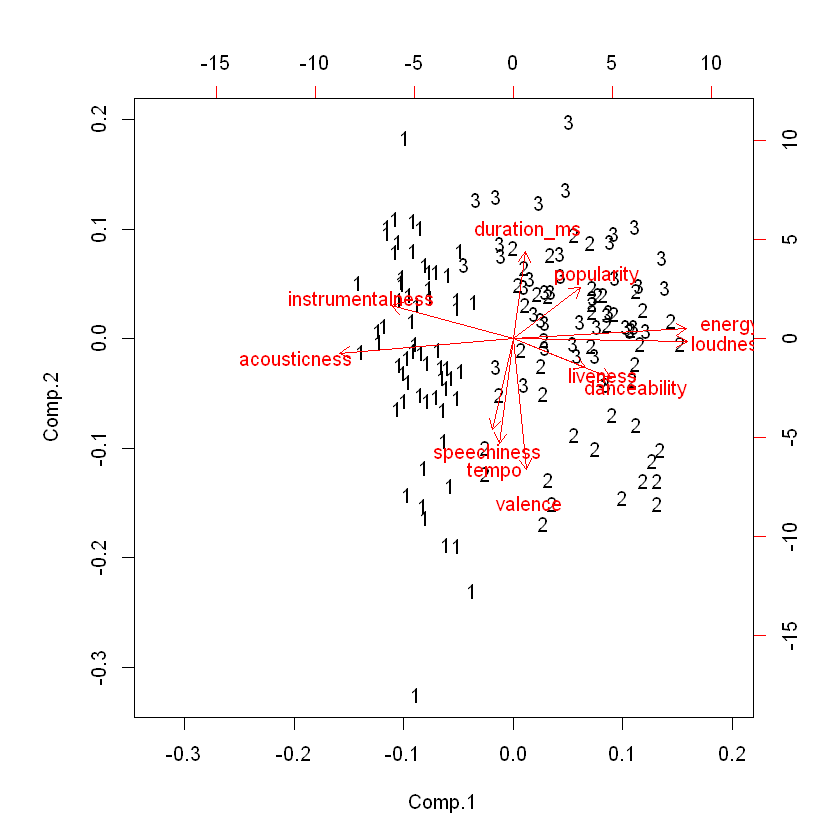

In [21]:
library(mclust)
library(cluster)
clus <-Mclust(datosC[,4:14],G=3)
summary(clus)
cl2 <- clus$classification
biplot(res,xlabs=cl2)


In [17]:
# (b) comparación de métodos con Purity: cl1 es agrupamiento con Som y cl2 con GMM
tab1 <-table(datosC[,1], cl1)
tab2 <-table(datosC[,1], cl2)
tab1
purity(cl1,datosC[,1])
tab2
purity(cl2,datosC[,1])



            cl1
              1  2  3
  Classical   2  7 62
  Electronic 38  0  1
  Rock       34  3  2

[1] 0.7181208

            cl2
              1  2  3
  Classical  63  5  3
  Electronic  0  8 31
  Rock        0 32  7

[1] 0.8456376

#### Respuestas Ejercicio 3
**a)** Se consideró GMM y SOM para hacer el análisis. Ambos métodos convergen, pero los agrupamientos son bastantes diferentes. En particular SOM genera un grupo algo desequilibrados (10 elementos en el menor,65 y 74 en los otros dos)

**b)** Al utilizar la etiqueta del tipo de música, resulta que GMM obtiene un agrupamiento mas acertado, con la medida Purity de 0.846 versus SOM con 0.78